# Primera tarea
Célula objetivo: células CHO

Modelo: Mus musculus iMM1415

# 1. FBA modelo iMM1415 predeterminado

In [73]:
#Importar modelo a escala genómica
import cobra
import numpy as np
import matplotlib.pyplot as plt
import re
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from cobra.flux_analysis import production_envelope
from numpy import zeros
model = cobra.io.read_sbml_model("iMM1415.xml.gz")

In [74]:
print "Distribución de flujos mediante FBA"
print "===================================="
solution=model.optimize()
model.summary()

Distribución de flujos mediante FBA
IN FLUXES         OUT FLUXES       OBJECTIVES
----------------  ---------------  ---------------------
o2_e      26.4    h_e      18      BIOMASS_mm_1...  1.36
lnlc_e     2      acac_e   12
arg__L_e   1      co2_e     6.51
glc__D_e   1      nh4_e     1.25
his__L_e   1      urea_e    0.486
ile__L_e   1      2mcit_e   0.198
leu__L_e   1      glyc_e    0.138
lys__L_e   1
phe__L_e   1
thr__L_e   1
trp__L_e   1
val__L_e   1
hdca_e     0.525
pi_e       0.485
met__L_e   0.386


In [75]:
print "Características del modelo" #(cantidad de reacciones, metabolitos y genes)
print "==========================="
print "               "

print "Reacciones"
print "=============="
print len(model.reactions)
print "               "

print "Metabolitos"
print "=============="
print len(model.metabolites)
print "               "

print "Genes involucrados"
print "====================="
print len(model.genes)
print "               "

print "Función obetivo del modelo"
print "====================="
print model.objective
print "               "

print "Valor de la solución objetivo"
print "================================"
print solution.objective_value 
print "               "

print "Reacción de biomasa"
print "================================"
biomass = model.reactions.get_by_id("BIOMASS_mm_1_no_glygln")
print biomass
print "=================================================================="

Características del modelo
               
Reacciones
3726
               
Metabolitos
2775
               
Genes involucrados
1375
               
Función obetivo del modelo
Maximize
1.0*BIOMASS_mm_1_no_glygln - 1.0*BIOMASS_mm_1_no_glygln_reverse_754f5
               
Valor de la solución objetivo
1.36342790565
               
Reacción de biomasa
BIOMASS_mm_1_no_glygln: 0.6 ala__L_c + 0.033 amp_c + 0.377 arg__L_c + 0.2881 asn__L_c + 0.359 asp__L_c + 43.153 atp_c + 0.018 chsterol_c + 0.003 clpn_hs_c + 0.0551 cmp_c + 0.145 cys__L_c + 0.0148 damp_c + 0.0099 dcmp_c + 0.0099 dgmp_c + 0.0148 dtmp_c + 0.322 gln__L_c + 0.386 glu__L_c + 0.538 gly_c + 0.0624 gmp_c + 43.153 h2o_c + 0.143 his__L_c + 0.324 ile__L_c + 0.564 leu__L_c + 0.57 lys__L_c + 0.138 met__L_c + 0.01 pail_hs_c + 0.069 pchol_hs_c + 0.026 pe_hs_c + 0.001 pglyc_hs_c + 0.219 phe__L_c + 0.313 pro__L_c + 0.003 ps_hs_c + 0.43 ser__L_c + 0.008 sphmyln_hs_c + 0.386 thr__L_c + 0.044 trp__L_c + 0.182 tyr__L_c + 0.033 ump_c + 0.416 val__L

In [76]:
print "Compartimentalización de las reacciones"
import re
def buscarMetabolito(nombreMetabolite):
    metabolites=[]
    for metabolite in model.metabolites:
        if re.match(nombreMetabolite,metabolite.id,re.IGNORECASE):    
            metabolites.append(metabolite) 
    if len(metabolites)==0:
        print "Not found metabolite"
        return None
    else: 
        for metabolite in metabolites:
            print "=========================================="
            print metabolite.name, metabolite.id
            print "=================================="
            for reaction in model.metabolites.get_by_id(metabolite.id).reactions:
                print reaction

result=buscarMetabolito("gln__L")
result=buscarMetabolito("glc__D")
result=buscarMetabolito("xoltri25_e")
result=buscarMetabolito("lac")
result=buscarMetabolito("nh4")

Compartimentalización de las reacciones
L-Glutamine gln__L_c
CYSGLNNaEx: cys__L_e + gln__L_c + na1_e --> cys__L_c + gln__L_e + na1_c
GLNCYSNaEx: cys__L_c + gln__L_e + na1_e --> cys__L_e + gln__L_c + na1_c
GLNTHRNaEx: gln__L_e + na1_e + thr__L_c --> gln__L_c + na1_c + thr__L_e
ALAGLNNaEx: ala__L_e + gln__L_c + na1_e --> ala__L_c + gln__L_e + na1_c
ALADGLNexR: ala__D_e + gln__L_c <=> ala__D_c + gln__L_e
ASNGLNNaEx: asn__L_e + gln__L_c + na1_e --> asn__L_c + gln__L_e + na1_c
PHACCOAGLNAC: gln__L_c + phaccoa_c --> coa_c + pheacgln_c
ALAGLNexR: ala__L_e + gln__L_c <=> ala__L_c + gln__L_e
NADS2: atp_c + dnad_c + gln__L_c + h2o_c --> amp_c + glu__L_c + h_c + nad_c + ppi_c
GF6PTA: f6p_c + gln__L_c --> gam6p_c + glu__L_c
THRGLNexR: gln__L_c + thr__L_e <=> gln__L_e + thr__L_c
SERDGLNexR: gln__L_c + ser__D_e <=> gln__L_e + ser__D_c
GMPS2: atp_c + gln__L_c + h2o_c + xmp_c --> amp_c + glu__L_c + gmp_c + 2.0 h_c + ppi_c
GLNt4: gln__L_e + na1_e --> gln__L_c + na1_c
PRFGS: atp_c + fgam_c + gln__L_c + 

In [77]:
print 
%matplotlib inline
prod_env = production_envelope(model, ["EX_gln__L_e", "EX_glc__D_e"]) 
prod_env.head(20)

,carbon_source,carbon_yield_maximum,carbon_yield_minimum,flux_maximum,flux_minimum,mass_yield_maximum,mass_yield_minimum,EX_gln__L_e,EX_glc__D_e
0,,NaN,NaN,1.363428,0.0,NaN,NaN,0.0,-1.000000
1,,NaN,NaN,1.363428,0.0,NaN,NaN,0.0,-0.260698
2,,NaN,NaN,1.363428,0.0,NaN,NaN,0.0,0.478603
3,,NaN,NaN,1.363428,0.0,NaN,NaN,0.0,1.217905
4,,NaN,NaN,1.363428,0.0,NaN,NaN,0.0,1.957206
5,,NaN,NaN,1.363428,0.0,NaN,NaN,0.0,2.696508
6,,NaN,NaN,1.363428,0.0,NaN,NaN,0.0,3.435809
7,,NaN,NaN,1.363428,0.0,NaN,NaN,0.0,4.175111
8,,NaN,NaN,1.363428,0.0,NaN,NaN,0.0,4.914412
9,,NaN,NaN,1.265587,0.0,NaN,NaN,0.0,5.653714


In [86]:
x=np.unique(-1*prod_env["EX_glc__D_e"])
y=np.unique(-1*prod_env["EX_gln__L_e"])
z=prod_env["flux_maximum"]

MATRIZ_SOLUCION=np.zeros((20,20))
for i in range(datos):
    print prod_env["flux_maximum"][i*20:(i+1)*20]
    MATRIZ_SOLUCION[i,0:20]=z[i*20:(i+1)*20]
print "Matriz solución"
print "====================="
print MATRIZ_SOLUCION

0     1.363428
1     1.363428
2     1.363428
3     1.363428
4     1.363428
5     1.363428
6     1.363428
7     1.363428
8     1.363428
9     1.265587
10    1.139348
11    1.013108
12    0.886868
13    0.760629
14    0.634389
15    0.507767
16    0.380825
17    0.253883
18    0.126942
19    0.000000
Name: flux_maximum, dtype: float64
20    1.291669
21    1.291669
22    1.291669
23    1.291669
24    1.291669
25    1.291669
26    1.291669
27    1.291669
28    1.291669
29    1.206919
30    1.080679
31    0.954440
32    0.828200
33    0.701961
34    0.575714
35    0.448772
36    0.321831
37    0.194889
38    0.067947
39         NaN
Name: flux_maximum, dtype: float64
40    1.219909
41    1.219909
42    1.219909
43    1.219909
44    1.219909
45    1.219909
46    1.219909
47    1.219909
48    1.219909
49    1.148251
50    1.022011
51    0.895772
52    0.769532
53    0.643292
54    0.516720
55    0.389778
56    0.262836
57    0.135894
58    0.008953
59         NaN
Name: flux_maximum, dtype: flo

NameError: name 'matrix' is not defined

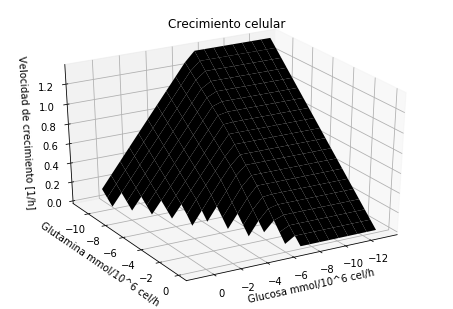

In [79]:
fig  = plt.figure()
ax   = Axes3D(fig)
x,y = np.meshgrid(x, y)
surf = ax.plot_surface(x, y, MATRIZ_SOLUCION, rstride=1, cstride=1, linewidth=1, antialiased=True, cmap=plt.cm.CMRmap)
ax.view_init(elev =None, azim =60)
ax.set_xlabel("Glucosa mmol/10^6 cel/h")
ax.set_ylabel("Glutamina mmol/10^6 cel/h")
ax.set_zlabel("Velocidad de crecimiento [1/h]")
plt.title("Crecimiento celular")
plt.show()

In [61]:
xlabels=np.unique(prod_env["EX_glc__D_e"])
ylabels=np.unique(prod_env["EX_gln__L_e"])

x_int=list(np.int_(xlabels))
y_int=list(np.int_(ylabels))

MATRIZ=np.zeros((20,20))
for i in range(20):
    MATRIZ[i,0:20]=prod_env["flux_maximum"][i*20:(i+1)*20]
print MATRIZ

[[1.36342791 1.36342791 1.36342791 1.36342791 1.36342791 1.36342791
  1.36342791 1.36342791 1.36342791 1.26558707 1.13934753 1.01310799
  0.88686845 0.76062892 0.63438938 0.50776687 0.38082515 0.25388344
  0.12694172 0.        ]
 [1.29166854 1.29166854 1.29166854 1.29166854 1.29166854 1.29166854
  1.29166854 1.29166854 1.29166854 1.20691886 1.08067932 0.95443978
  0.82820025 0.70196071 0.57571405 0.44877233 0.32183062 0.1948889
  0.06794718        nan]
 [1.21990918 1.21990918 1.21990918 1.21990918 1.21990918 1.21990918
  1.21990918 1.21990918 1.21990918 1.14825065 1.02201111 0.89577158
  0.76953204 0.6432925  0.51671951 0.3897778  0.26283608 0.13589436
  0.00895264        nan]
 [1.14814982 1.14814982 1.14814982 1.14814982 1.14814982 1.14814982
  1.14814982 1.14814982 1.14814982 1.08958244 0.9633429  0.83710337
  0.71086383 0.58462429 0.45772498 0.33078326 0.20384154 0.07689982
         nan        nan]
 [1.07639045 1.07639045 1.07639045 1.07639045 1.07639045 1.07639045
  1.07639045 1.07

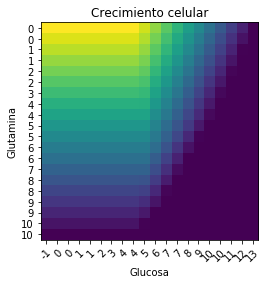

In [80]:
fig,ax=plt.subplots()
ax.set_xticks(np.arange(len(x_int)))
ax.set_yticks(np.arange(len(y_int)))

ax.set_xticklabels(x_int)
ax.set_yticklabels(y_int)   

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_xlabel("Glucosa")
ax.set_ylabel("Glutamina")
ax.set_title("Crecimiento celular")
MATRIZ[np.isnan(MATRIZ)]=0
ax.imshow(MATRIZ)

# 2. Simulación del modelo iMM1415 con datos experimentales

In [81]:
#Glutamina (EX_gln_D_e)
value = -0.019 #(mmol/10^6cel/h)
model.reactions.get_by_id("EX_gln__L_e").upper_bound=value+0.1*value 
model.reactions.get_by_id("EX_gln__L_e").lower_bound=value-0.1*value

#Glucosa (EX_glc_D_e), se consume por eso es signo negativo
value = -0.186 #(mmol/10^6cel/h)
model.reactions.get_by_id("EX_glc__D_e").upper_bound=value+0.1*value 
model.reactions.get_by_id("EX_glc__D_e").lower_bound=value-0.1*value

solution=model.optimize()
print "Distribución de flujos con datos experimentales mediante FBA"
print "============================================================="
model.summary()

Distribución de flujos con datos experimentales mediante FBA
IN FLUXES          OUT FLUXES       OBJECTIVES
-----------------  ---------------  ---------------------
o2_e      39.3     co2_e    15.8    BIOMASS_mm_1...  1.37
lnlc_e     2       h_e      15.2
arg__L_e   1       ac_e      7.4
fe3_e      1       bhb_e     6.84
glyc_e     1       h2o2_e    5.59
hdca_e     1       nh4_e     1.26
his__L_e   1       fe2_e     1
ile__L_e   1       for_e     0.964
leu__L_e   1       urea_e    0.485
lys__L_e   1       succ_e    0.375
phe__L_e   1       2mcit_e   0.198
thr__L_e   1
trp__L_e   1
val__L_e   1
pi_e       0.486
met__L_e   0.386
glc__D_e   0.167
gln__L_e   0.0171


In [87]:
v_p = np.array([solution.fluxes["EX_glc__D_e"], solution.fluxes["EX_gln__L_e"]])
v_e= np.array ([0.186,0.019])
#Trasponer matrices
d = (v_e - v_p)
Norma_Euclideana = np.dot(d,d)
print "Error de ajuste de los datos experimentales al modelo iMM1415"
print "====================================================="
print Norma_Euclideana

Error de ajuste de los datos experimentales al modelo iMM1415
0.12619477
